Lista 4 - AMA - Luis Fernando Bastos Rego - 470043
#Inicialização do modelo:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(12345)
random.seed(12345)

dataset_q1 = np.genfromtxt('./concrete.csv', delimiter=',')
x_q1 = dataset_q1[:,:-1]
y_q1 = np.reshape(dataset_q1[:,[-1]], (-1,))

dataset_q2 = np.genfromtxt('./vowel.csv', delimiter=',')
x_q2 = dataset_q2[:,:-1]
y_q2 = np.reshape(dataset_q2[:,[-1]], (-1,))


print('Questão 1:')
print(f"Número de amostras: {dataset_q1.shape[0]}")
print(f"Número de dimensões: {dataset_q1.shape[1]}")
print('\nQuestão 2:')
print(f"Número de amostras: {dataset_q2.shape[0]}")
print(f"Número de dimensões: {dataset_q2.shape[1]}")
print(f"Número de classes: {np.unique(dataset_q2[:,[-1]]).shape[0]}")
#print(f"Número de folds: {len(fold_list)}")

Questão 1:
Número de amostras: 1030
Número de dimensões: 9

Questão 2:
Número de amostras: 990
Número de dimensões: 11
Número de classes: 11


* Separando os conjuntos dos dados para cada modelo e normalizando os valores:

In [5]:
# questão 1: 
x_q1_train, x_q1_test, y_q1_train, y_q1_test = train_test_split(x_q1, y_q1, test_size=0.2)
x_q1_train, x_q1_val, y_q1_train, y_q1_val = train_test_split(x_q1_train, y_q1_train, test_size=0.25) # 0.25 x 0.8 = 0.2
scaler = StandardScaler().fit(x_q1_train)
x_q1_train_scaled = scaler.transform(x_q1_train)
x_q1_test_scaled = scaler.transform(x_q1_test)
x_q1_val_scaled = scaler.transform(x_q1_val)

# questão 2: 
x_q2_train, x_q2_test, y_q2_train, y_q2_test = train_test_split(x_q2, y_q2, test_size=0.2)
x_q2_train, x_q2_val, y_q2_train, y_q2_val = train_test_split(x_q2_train, y_q2_train, test_size=0.25) # 0.25 x 0.8 = 0.2
scaler = StandardScaler().fit(x_q2_train)
x_q2_train_scaled = scaler.transform(x_q2_train)
x_q2_test_scaled = scaler.transform(x_q2_test)
x_q2_val_scaled = scaler.transform(x_q2_val)

# (Questão 1) Treinamento e escolha dos modelos:



In [9]:
iterations = 200
q1_reg_list = []
highest_acc = 0
best = 0
# random search de 10 modelos:
for i in range(10): 
  hidden_layer = (random.randint(4,16),)
  batch = random.choice([16,32,64,128,256])
  alpha = random.uniform(1e-5,1e-4)
  momentum = random.uniform(0.85,0.95)
  print(f'\nHyperparameters of model {i}:\n')
  print(f'Hidden layer size: {hidden_layer[0]};')
  print(f'Batch size: {batch};')
  print(f'Alpha: {alpha}')
  print(f'Momentum: {momentum:.2f}')
  mlp_q1 = MLPRegressor(hidden_layer_sizes=hidden_layer, solver='sgd', batch_size=batch, alpha=alpha, momentum=momentum, max_iter=iterations).fit(x_q1_train_scaled, y_q1_train)
  # visando simplificação, utilizaremos apenas a acurácia para determinar o melhor modelo:
  score = mlp_q1.score(x_q1_val_scaled,y_q1_val)
  if score > highest_acc:
    best = i
  q1_reg_list.append(mlp_q1)


Hyperparameters of model 0:

Hidden layer size: 4;
Batch size: 16;
Alpha: 6.634935538665332e-05
Momentum: 0.88

Hyperparameters of model 1:

Hidden layer size: 13;
Batch size: 128;
Alpha: 9.303437557613678e-05
Momentum: 0.90

Hyperparameters of model 2:

Hidden layer size: 9;
Batch size: 16;
Alpha: 6.0090669866422953e-05
Momentum: 0.86

Hyperparameters of model 3:

Hidden layer size: 6;
Batch size: 64;
Alpha: 3.075782759705708e-05
Momentum: 0.87

Hyperparameters of model 4:

Hidden layer size: 8;
Batch size: 32;
Alpha: 5.8340847627473e-05
Momentum: 0.90

Hyperparameters of model 5:

Hidden layer size: 4;
Batch size: 32;
Alpha: 1.0286646777328761e-05
Momentum: 0.90

Hyperparameters of model 6:

Hidden layer size: 6;
Batch size: 256;
Alpha: 9.404281632499152e-05
Momentum: 0.94

Hyperparameters of model 7:

Hidden layer size: 8;
Batch size: 256;
Alpha: 7.750210111254776e-05
Momentum: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



Hyperparameters of model 8:

Hidden layer size: 16;
Batch size: 128;
Alpha: 4.750463877897249e-05
Momentum: 0.87

Hyperparameters of model 9:

Hidden layer size: 6;
Batch size: 16;
Alpha: 4.3562224803432265e-05
Momentum: 0.87


(Questão 1) Apresentação das métricas:




Best model found was model 9, with following metrics:
for training set:
RMSE: 7.35
MAE: 5.63
MRE: 0.18
for validation set:
RMSE: 6.62
MAE: 4.81
MRE: 0.17
for testing set:
RMSE: 7.82
MAE: 5.74
MRE: 0.18


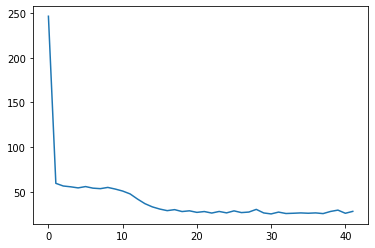

In [41]:
best_reg = q1_reg_list[best]
best_reg = best_reg.fit( np.concatenate((x_q1_train_scaled, x_q1_val_scaled)),  np.concatenate((y_q1_train, y_q1_val)) )
# escolhido o melhor modelo, apresentamos a curva da função custo e suas métricas:
print(f'\nBest model found was model {i}, with following metrics:')
print(f'for training set:')
print(f'RMSE: {metrics.mean_squared_error(y_q1_train, best_reg.predict(x_q1_train_scaled)) ** 0.5:.2f}')
print(f'MAE: {metrics.mean_absolute_error(y_q1_train, best_reg.predict(x_q1_train_scaled)):.2f}')
print(f'MRE: {metrics.mean_absolute_percentage_error(y_q1_train, best_reg.predict(x_q1_train_scaled)):.2f}')
print(f'for validation set:')
print(f'RMSE: {metrics.mean_squared_error(y_q1_val, best_reg.predict(x_q1_val_scaled)) ** 0.5:.2f}')
print(f'MAE: {metrics.mean_absolute_error(y_q1_val, best_reg.predict(x_q1_val_scaled)):.2f}')
print(f'MRE: {metrics.mean_absolute_percentage_error(y_q1_val, best_reg.predict(x_q1_val_scaled)):.2f}')
print(f'for testing set:')
print(f'RMSE: {metrics.mean_squared_error(y_q1_test, best_reg.predict(x_q1_test_scaled)) ** 0.5:.2f}')
print(f'MAE: {metrics.mean_absolute_error(y_q1_test, best_reg.predict(x_q1_test_scaled)):.2f}')
print(f'MRE: {metrics.mean_absolute_percentage_error(y_q1_test, best_reg.predict(x_q1_test_scaled)):.2f}')
plt.plot(np.arange(len(best_reg.loss_curve_)),best_reg.loss_curve_)
plt.show()

# (Questão 2): Treinamento e escolha dos modelos:

In [25]:
iterations = 1000
q2_clf_list = []
highest_acc = 0
# random search de 10 modelos:
for i in range(10): 
  hidden_layer = (random.choice([16,32,64,128]),)
  batch = random.choice([16,32,64])
  alpha = random.uniform(1e-5,1e-4)
  momentum = random.uniform(0.85,0.95)
  print(f'\nHyperparameters of model {i}:\n')
  print(f'Hidden layer size: {hidden_layer[0]};')
  print(f'Batch size: {batch};')
  print(f'Alpha: {alpha}')
  print(f'Momentum: {momentum:.2f}')
  mlp_q2 = MLPClassifier(hidden_layer_sizes=hidden_layer, solver='sgd', batch_size=batch, alpha=alpha, momentum=momentum, max_iter=iterations).fit(x_q2_train_scaled, y_q2_train)
  # visando simplificação, utilizaremos apenas a acurácia para determinar o melhor modelo:
  score = mlp_q2.score(x_q2_val,y_q2_val)
  print(f'Score: {score:.2f}')
  if score > highest_acc:
    best = i
  q2_clf_list.append(mlp_q2)


Hyperparameters of model 0:

Hidden layer size: 128;
Batch size: 64;
Alpha: 2.4279643527717736e-05
Momentum: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.10

Hyperparameters of model 1:

Hidden layer size: 16;
Batch size: 64;
Alpha: 9.099657792375759e-05
Momentum: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 2:

Hidden layer size: 64;
Batch size: 32;
Alpha: 7.587573494995417e-05
Momentum: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 3:

Hidden layer size: 128;
Batch size: 64;
Alpha: 6.781495303590166e-05
Momentum: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 4:

Hidden layer size: 32;
Batch size: 64;
Alpha: 1.0656569731230925e-05
Momentum: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.10

Hyperparameters of model 5:

Hidden layer size: 16;
Batch size: 32;
Alpha: 2.4411243392086e-05
Momentum: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 6:

Hidden layer size: 32;
Batch size: 32;
Alpha: 2.4435995132325666e-05
Momentum: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 7:

Hidden layer size: 64;
Batch size: 32;
Alpha: 1.3528945758016864e-05
Momentum: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 8:

Hidden layer size: 128;
Batch size: 16;
Alpha: 4.122090667797061e-05
Momentum: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score: 0.11

Hyperparameters of model 9:

Hidden layer size: 32;
Batch size: 64;
Alpha: 7.906633078200749e-05
Momentum: 0.89
Score: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(Questão 2) Apresentação das métricas:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



Best model found was model 9, with following metrics:
for training set:
accuracy: 0.97
for validation set:
accuracy: 0.98
for testing set:
accuracy: 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


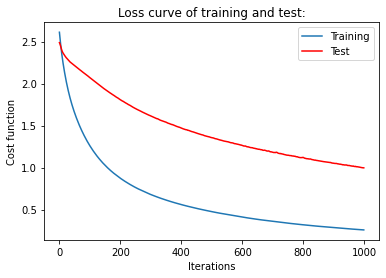

In [36]:
best_clf = q2_clf_list[best]
best_clf = best_clf.fit( np.concatenate((x_q2_train_scaled, x_q2_val_scaled)),  np.concatenate((y_q2_train, y_q2_val)) )
# escolhido o melhor modelo, apresentamos a curva da função custo e suas métricas:
print(f'\nBest model found was model {i}, with following metrics:')
print(f'for training set:')
print(f'accuracy: {metrics.accuracy_score(y_q2_train, best_clf.predict(x_q2_train_scaled)) ** 0.5:.2f}')
print(f'for validation set:')
print(f'accuracy: {metrics.accuracy_score(y_q2_val, best_clf.predict(x_q2_val_scaled)) ** 0.5:.2f}')
print(f'for testing set:')
print(f'accuracy: {metrics.accuracy_score(y_q2_test, best_clf.predict(x_q2_test_scaled)) ** 0.5:.2f}')
plt.plot(np.arange(len(best_clf.loss_curve_)),best_clf.loss_curve_, label='Training')
plt.title("Loss curve of training and test:")
best_clf=best_clf.fit(x_q2_test, y_q2_test)
plt.plot(np.arange(len(best_clf.loss_curve_)),best_clf.loss_curve_, '-r', label='Test')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.legend(loc="upper right")
plt.show()